In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
import re
import math
import collections

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from matplotlib import rcParams
from matplotlib import gridspec
from sklearn import linear_model
from IPython.display import display
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline

# params
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [550]:
data1 = pd.read_csv('/Users/talia/Downloads/data_no_out.csv')
data1.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.

In [551]:
data = data1.drop(['Unnamed: 0'],axis=1)
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.34,0.60

In [494]:
class dataProfiling:

    def moreInfo(self, data):
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of duplicates
        print(f"Total duplicated values : {str(data.duplicated().sum())}")

        # counts no. of missing values
        print(f"Total null values : {data.isnull().sum().sum():,}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumn(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def visualizeNull(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumn(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)
            
# instance of the dataProfiling class
profiler = dataProfiling()

In [552]:
profiler.uniqueColumn(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Bankrupt?' : 2 including NaN values, 2 excluding Nan values

[1 0]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(C) before interest and depreciation before interest' : 3298 including NaN values, 3298 excluding Nan values

[0.37059426 0.46429094 0.42607127 ... 0.28494126 0.54789646 0.49953688]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(A) before interest and  after tax' : 3111 including NaN values, 3111 excluding Nan values

[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'RO

In [553]:
profiler.moreInfo(data)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (6734, 96)

Total rows in the dataset : 6,734
Total columns in the dataset : 96
Total duplicated values : 0
Total null values : 0

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 0.0%
Percentage of duplicates in the data : 0.0%




In [555]:
profiler.valueCounts(data)


COUNT VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Bankrupt?' : 2 rows, 6734 values in Total



TypeError: 'CalibrationDisplay' object is not callable

In [556]:
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


TypeError: 'CalibrationDisplay' object is not callable

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


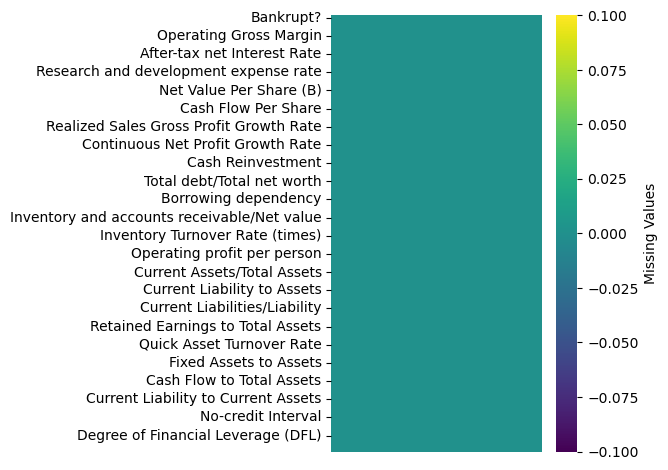



METHOD 2




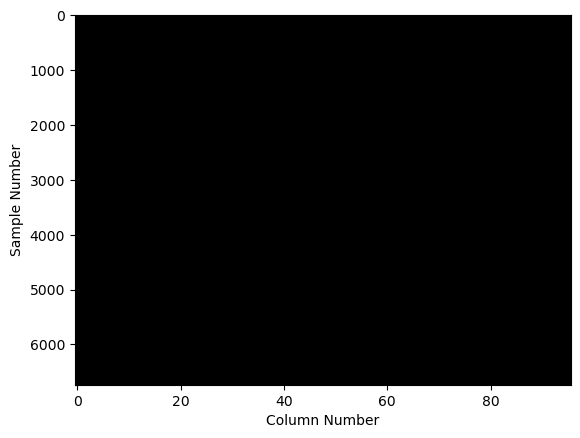

In [558]:
profiler.visualizeNull(data)

In [559]:
profiler.nullData(data)

DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :


TypeError: 'CalibrationDisplay' object is not callable

In [ ]:
profiler.descriptiveData(data)

In [ ]:
profiler.uniqueColumn(data)

In [ ]:
# for each numerical feature compute number of unique entries

unique_values = data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=False, title="Unique values per feature", figsize=(30,10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [ ]:
data.corr()

In [ ]:
# drop the column 'Net Income Flag' because it just has 1 value: Nan

df = data.drop(columns= ['Net Income Flag'])
df.head()

In [ ]:
# drop unescessary columns.

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Columns to drop: {to_drop}")
print(f"Number of columns to drop; {len(to_drop)}")

df.drop(to_drop, axis=1, inplace=True)
display(df)

In [ ]:
# to look at VarianceThresholds we need all the variable to be on the same scale
# we will use MinMaxScaler for this
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
pd.DataFrame(df_scaled).head()

In [ ]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(df_scaled)
temp = sel.transform(df_scaled)
temp = pd.DataFrame(temp)
print(df_scaled.shape)
print(temp.shape)

In [ ]:
pd.DataFrame(temp).head()

In [ ]:
# To check which columns were removed, you can manipulate the results
# from the code below. This gives the variance of each feature in order
# of appearance of the dataset.

sel.variances_

In [ ]:
#This gives you the result as True and False for the columns that we
# selected and those which were removed, respectively.
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list

In [ ]:
list(zip(df.columns, var_list))

In [ ]:
[col[0] for col in zip(df.columns, var_list) if col[1] == False]

In [ ]:
removed_columns = pd.DataFrame(data=(df.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

In [ ]:
X = df_scaled
y = df['Bankrupt?']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

In [ ]:
# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df_k = pd.DataFrame(data = model.scores_, columns = ['score'])
df_k['Column'] = df.columns
print(df_k.sort_values(by = ['score'], ascending = False).head(10))

In [ ]:
cols = df_k.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols

In [ ]:
selected.columns = cols
selected.describe()

In [ ]:
#split the data into training and validation set by a 80/20 split

from sklearn import model_selection
feature_cols = df.columns[1:].tolist()
X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
        df[feature_cols],
        df['Bankrupt?'],
        test_size=0.2,
        random_state=1)
    )


In [ ]:
# two-class classification dataset

from sklearn.datasets import make_classification

np.random.seed(42)
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.axis('off')

In [ ]:
# calibration curves
# A great way of checking how a classifier's probability forecasting is performing on dataset of interest is 
# using a so-called calibration curve

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# For binary classification tasks predict_proba returns a matrix containing the first class proba in the first entry,
# and the second class proba in the second entry. Since there are only two classes one is just 1 - n of the other.
# The calibration_curve implementation expects just one of these classes in an array, so we index that.
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

In [ ]:
# The fraction_of_positives is the percentage of records in the chosen bin which actually belong to the dominant 
# class. This is determined by looking at what values these points are actually assigned in  y , and it is the 
# emperical truth.

fraction_of_positives

In [ ]:
# mean_predicted_value, is the mean probability of these points belonging to the dominant class reported 
# by the algorithm.

mean_predicted_value

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$LogisticRegression$ Calibration Curve", fontsize=20); pass

In [ ]:
np.random.seed(42)
X, y = make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=2)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$GaussianNB$ Sample Calibration Curve", fontsize=20); pass

In [ ]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [ ]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [ ]:
count_classes = df['Bankrupt?'].value_counts()
count_classes.plot(kind = 'bar')

In [ ]:
# all features are numeric, so no need to split into _num and _cat
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))#, columns=X_train.columns)

# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test))#, columns=X_test.columns)
X_train_scaled

In [ ]:
# class count
bankrupt_count_0, bankrupt_count_1 = data['Bankrupt?'].value_counts()

# Separate class
bankrupt_0 = df[df['Bankrupt?'] == 0]
bankrupt_1 = df[df['Bankrupt?'] == 1]# print the shape of the class
print('bankrupt 0:', bankrupt_0.shape)
print('bankrupt 1:', bankrupt_1.shape)

In [ ]:
from sklearn.utils import resample

yes_bankrupt_oversampled = resample(bankrupt_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(bankrupt_0),#<- make both sets the same size
                                    random_state=0)

In [ ]:
bankrupt_1.groupby(bankrupt_1.columns.tolist(),as_index=False).size()

In [ ]:
yes_bankrupt_oversampled.groupby(yes_bankrupt_oversampled.columns.tolist(),as_index=False).size()

In [ ]:
yes_bankrupt_oversampled.groupby(yes_bankrupt_oversampled.columns.tolist(),as_index=False).size()['size'].value_counts()

In [ ]:
# both sets are now of a reasonable size
print(bankrupt_0.shape)
print(yes_bankrupt_oversampled.shape)

In [ ]:
train_oversampled = pd.concat([bankrupt_0,yes_bankrupt_oversampled],axis=0)
train_oversampled['Bankrupt?'].value_counts()

In [ ]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop('Bankrupt?',axis = 1).copy()

In [ ]:
X_train_over

In [ ]:
X_test_scaled

In [ ]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

In [ ]:
X.shape

In [ ]:
bankrupt_0_under = bankrupt_0.sample(bankrupt_count_1)

test_under = pd.concat([bankrupt_0_under, bankrupt_1], axis=0)

print("total bankrupt of 1 and 0:",test_under['Bankrupt?'].value_counts())# plot the count after under-sampeling
test_under['Bankrupt?'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
bankrupt_1_over = bankrupt_1.sample(bankrupt_count_0, replace=True)

test_over = pd.concat([bankrupt_1_over, bankrupt_0], axis=0)

print("total bankrupt of 1 and 0:",test_under['Bankrupt?'].value_counts())# plot the count after under-sampeling
test_over['Bankrupt?'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
normalizing
powertransform

In [ ]:
print("Data = ", df)

# normalize the data attributes
normalized = preprocessing.normalize(df)
print("Normalized Data = ", normalized)